In [1]:
#using TaylorSeries
include("UndrivenHelium.jl")
#include("Integ.jl")
using Plots, LaTeXStrings
# plotly()
pyplot(grid = :false, size=(600,600), color=:black, markersize = 0.3 )
const Z = 2.0
const order = 34
const t0 = 0.0
const t_max = 0.5 
const abs_tol = 1.0E-20
const steps = 8_000;

In [2]:
include("Integ.jl")

taylorintegps (generic function with 1 method)

In [3]:
#Cargamos soluciones en archivos de texto
xvSv = Array{Float64,2}[]
xvSv2 = Array{Float64,2}[]


for j in 1:5000
    dir =string("MonteCarlo/xvSv",string(j),".csv")
    x = readcsv(dir)
    push!(xvSv, x)
end

for j in 1:800
    dir =string("Circ/xvSv",string(j),".csv")
    x = readcsv(dir)
    push!(xvSv2, x)
end

In [4]:
xsv = copy(xvSv)
x0 = xvSv[1]
for k in 1:length(xvSv)
    xsv[k] -= x0
end

xsv2 = copy(xvSv2)
x0 = xvSv2[1]
for k in 1:length(xvSv2)
    xsv2[k] -= x0
end

In [5]:
#Vemos si las cosas se salen de control
poincareuh = @animate for i=1:157
    scatter(map(x->x[i,1], xvSv), map(x->x[i,3], xvSv), label="$(i)-th iterate", m=(1,stroke(0)))
    scatter!(map(x->x[i,1], xvSv2), map(x->x[i,3], xvSv2), label="$(i)-th iterate", m=(1,stroke(0)), color = :red)
    xlims!(5.8003997,5.8004053)
    ylims!(-0.00000025,0.00000025)
    xlabel!("x")
    ylabel!("pₓ")
    title!("UH Poincaré map near at point (5.8004, 0.0)")
end
gif(poincareuh, "./poincareuh2.gif", fps = 2)

INFO: Saved animation to /home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh2.gif


Plots.AnimatedGif("/home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh2.gif")

In [6]:
poincareuh = @animate for i=1:15:157
    scatter(map(x->x[i,1], xvSv), map(x->x[i,3], xvSv), label="$(i)-th iterate", m=(1,stroke(0)))
    scatter!(map(x->x[i,1], xvSv2), map(x->x[i,3], xvSv2), label="$(i)-th iterate", m=(1,stroke(0)), color = :red)
    xlims!(5.8003997,5.8004053)
    ylims!(-0.00000025,0.00000025)
    xlabel!("x")
    ylabel!("pₓ")
    title!("UH Poincaré map near at point (5.8004, 0.0)")
end
gif(poincareuh, "./poincareuh3.gif", fps = 2)

INFO: Saved animation to /home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh3.gif


Plots.AnimatedGif("/home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh3.gif")

In [20]:

x0 = Float64[5.8004, 0.00000000]
circ_inis = Array{Array{Float64,1},1}(5000)
circ_inis[1] = x0
for i in 2:5000
    rand1 = rand(); rand2 = rand()
    x_ini = x0 + 0.00000002*[rand1*cos(2pi*rand2),rand1*sin(2pi*rand2)]
    circ_inis[i] = x_ini
end


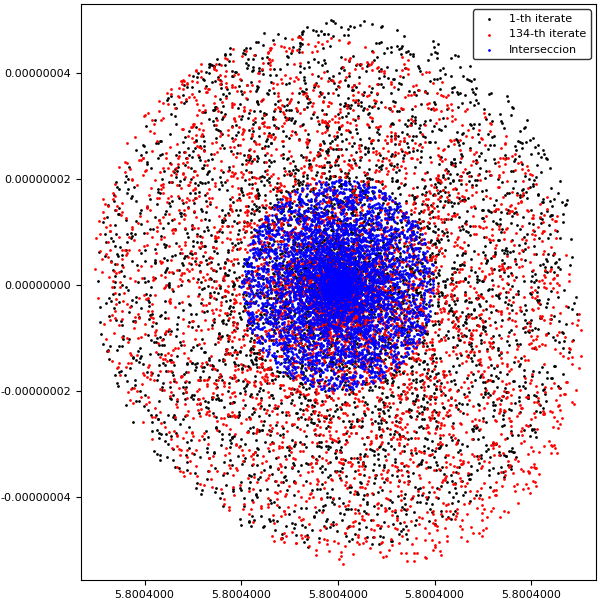

In [22]:
scatter(map(x->x[1,1], xvSv), map(x->x[1,3], xvSv), label="$(1)-th iterate", m=(2,stroke(0)))
scatter!(map(x->x[134,1], xvSv), map(x->x[134,3], xvSv), label="$(134)-th iterate", m=(2,stroke(0)), color = :red)
scatter!(map(x->x[1], circ_inis), map(x->x[2], circ_inis), label="Interseccion", m=(2,stroke(0)), color = :blue)

In [9]:

#Vemos la evolución del volumen
poincareuh = @animate for i=1:157
    scatter(map(x->x[i,1], xsv), map(x->x[i,3], xsv), label="$(i)-th iterate", m=(2,stroke(0)))
    #scatter!(map(x->x[i,1], xsv2), map(x->x[i,3], xsv2), label="$(i)-th iterate", m=(1,stroke(0)), color = :red)
    xlims!(-0.0000005,0.0000005)
    ylims!(-0.0000005,0.0000005)
    xlabel!("x")
    ylabel!("pₓ")
    title!("UH Poincaré map near at point (5.8004, 0.0)")
end
gif(poincareuh, "./poincareuh3.gif", fps = 2)

INFO: Saved animation to /home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh3.gif


Plots.AnimatedGif("/home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh3.gif")

In [14]:
function psundriven{T<:Number}(x10::T, px10::T; tol::Float64 = 1e-20, tmax = 100.0, maxsteps1 = 5_000 )
    c1 = condini1D(x10, px10)
    t, x, tp, xp = taylorintegps(undrivenHelium1D!, c1, t0, tmax, order, abs_tol; maxsteps = maxsteps1)
    
    xpm = similar(xp)
    xpm[:,1] = map(ks, xp[:,1])
    xpm[:,3] = Float64[ksv(xp[k,1], xp[k, 3]) for k in eachindex(tp)]
    xpm[:,2] = map(ks, xp[:,2])
    xpm[:,4] = Float64[ksv(xp[k,2], xp[k, 4]) for k in eachindex(tp)]

    return xpm, t, x
end
function ksv(Q, P)
    v₁ = P/2Q
    return v₁
end
ks(Q) = Q^2

ks (generic function with 1 method)

In [23]:
xvSv3 = Array{Float64,2}[]

#Comentado, pues ya se calculó
contador = 0
@time for x in circ_inis
    xtemp = Float64[x[1], 0.0, x[2], Inf]
    xp, t, xt = psundriven(x[1], x[2]; tmax = 120.0, maxsteps1 = 5_000 )
    push!(xvSv3, vcat(xtemp', xp))
    contador += 1
    if mod(contador, 500) == 0
        println(string(contador), " de 5000")
    end
end

contador = 1
for x in xvSv3
    dir =string("MonteCarlo2/xvSv",string(contador),".csv")
    writecsv(dir, x)
    contador += 1
end

#for j in 1:5000
#    dir =string("MonteCarlo2/xvSv",string(j),".csv")
#    x = readcsv(dir)
#    push!(xvSv3, x)
#end

500 de 5000
1000 de 5000
1500 de 5000
2000 de 5000
2500 de 5000
3000 de 5000
3500 de 5000
4000 de 5000
4500 de 5000
5000 de 5000
4072.051173 seconds (26.16 G allocations: 2.777 TiB, 21.86% gc time)


In [26]:
x0 = Float64[5.8004000, 0.00]
circ_inis2 = Array{Array{Float64,1},1}(5000)
circ_inis2[1] = x0
for i in 2:5000
    rand1 = rand(); rand2 = rand()
    x_ini = x0 + 0.000000006*[rand1*cos(2pi*rand2),rand1*sin(2pi*rand2)]
    circ_inis2[i] = x_ini
end


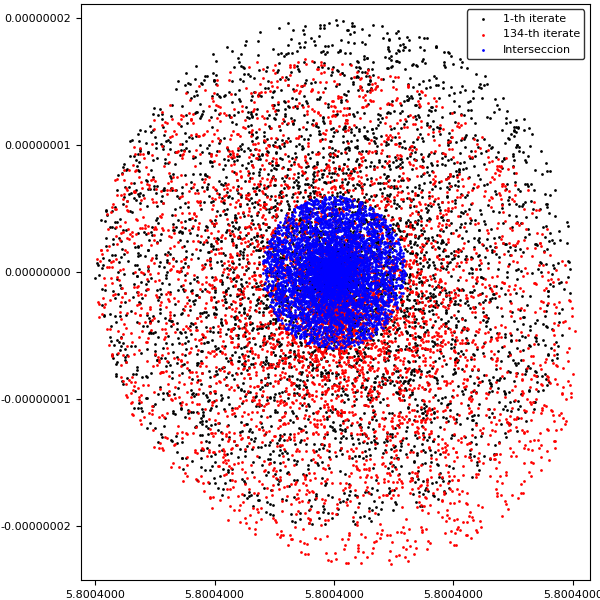

In [27]:
scatter(map(x->x[1,1], xvSv3), map(x->x[1,3], xvSv3), label="$(1)-th iterate", m=(2,stroke(0)))
scatter!(map(x->x[134,1], xvSv3), map(x->x[134,3], xvSv3), label="$(134)-th iterate", m=(2,stroke(0)), color = :red)
scatter!(map(x->x[1], circ_inis2), map(x->x[2], circ_inis2), label="Interseccion", m=(2,stroke(0)), color = :blue)

In [15]:
xvSv4 = Array{Float64,2}[]
contador = 0
@time for x in circ_inis2
    xtemp = Float64[x[1], 0.0, x[2], Inf]
    xp, t, xt = psundriven(x[1], x[2]; tmax = 120.0, maxsteps1 = 5_000 )
    push!(xvSv4, vcat(xtemp', xp))
    contador += 1
    if mod(contador, 500) == 0
        println(string(contador), " de 5000")
    end
end

500 de 5000
1000 de 5000
1500 de 5000
2000 de 5000
2500 de 5000
3000 de 5000
3500 de 5000
4000 de 5000
4500 de 5000
5000 de 5000
2586.367910 seconds (26.17 G allocations: 2.777 TiB, 22.89% gc time)


In [16]:
contador = 1
for x in xvSv4
    dir =string("MonteCarlo3/xvSv",string(contador),".csv")
    writecsv(dir, x)
    contador += 1
end


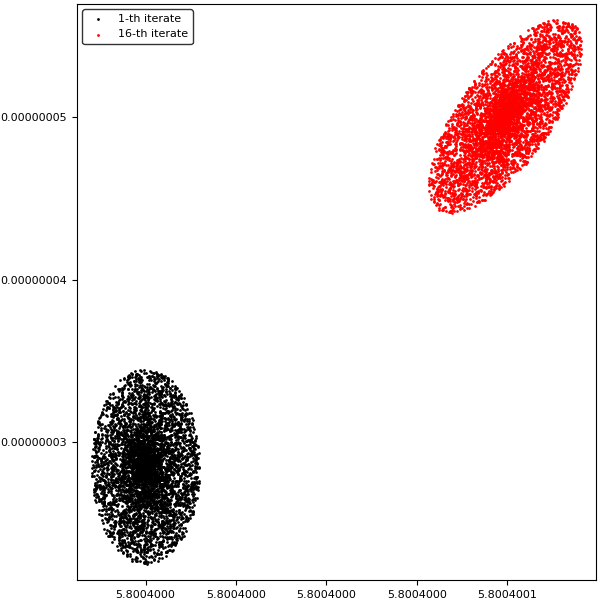

In [17]:
scatter(map(x->x[1,1], xvSv4), map(x->x[1,3], xvSv4), label="$(1)-th iterate", m=(2,stroke(0)))
scatter!(map(x->x[16,1], xvSv4), map(x->x[16,3], xvSv4), label="$(16)-th iterate", m=(2,stroke(0)), color = :red)